


##### New York City- Department of Buildings
<h1>DOB ECB Fines- a brief Analysis</h1>
<h3>Are DOB Violations precautionary or just a headache?</h3>
<p>The Department of Buildings (DOB) in New York City regulates City Construction Codes, Zoning, and  Dwelling Laws for over one million construction sites and buildings in New York City. Their aim is to enforce compliance to promote safety for workers and the public.<p> 

<p>With their annual reviews and site inspections Violations are issued across the city for a range of differnt infractions.</p>

The dataset is from the [New York City Open Data source](https://data.cityofnewyork.us/Housing-Development/DOB-ECB-Violations/6bgk-3dad) pertaining specifically to the DOB ECB (Enviornmental Control Board) violations. The data has approx. 1.5 million datapoints dating back to before 1920.



# Import Libraries

In [1]:
#import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import math
import seaborn as sns
import datetime as dt

#Load Data

In [2]:
#mount google drive so for access to csv with dataset

#from google.colab import drive 
#drive.mount('/content/drive')

In [3]:
#set display options so we can view our data to clean
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', (999))


In [4]:
#create dataset to work with
dob= pd.read_csv('DOB_ECB_Violations.csv')

#make a copy that is clean
dob_Restore = dob.copy(deep=True)
dob.shape

#review data
dob.info()
dob.describe()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459081 entries, 0 to 1459080
Data columns (total 46 columns):
ISN_DOB_BIS_EXTRACT          1459081 non-null int64
ECB_VIOLATION_NUMBER         1459081 non-null object
ECB_VIOLATION_STATUS         1459081 non-null object
DOB_VIOLATION_NUMBER         1437507 non-null object
BIN                          1454858 non-null object
BORO                         1459081 non-null int64
BLOCK                        1433345 non-null object
LOT                          1433342 non-null float64
HEARING_DATE                 1459081 non-null int64
HEARING_TIME                 1459081 non-null int64
SERVED_DATE                  1459081 non-null int64
ISSUE_DATE                   1459081 non-null int64
SEVERITY                     1459081 non-null object
VIOLATION_TYPE               1459081 non-null object
RESPONDENT_NAME              1458436 non-null object
RESPONDENT_HOUSE_NUMBER      1309130 non-null object
RESPONDENT_STREET            1334610 non-nul

,ISN_DOB_BIS_EXTRACT,BORO,LOT,HEARING_DATE,HEARING_TIME,SERVED_DATE,ISSUE_DATE,PENALITY_IMPOSED,AMOUNT_PAID,BALANCE_DUE
count,1.459081e+06,1.459081e+06,1.433342e+06,1.459081e+06,1.459081e+06,1.459081e+06,1.459081e+06,1.459076e+06,1.459075e+06,1.459080e+06
mean,7.333863e+05,4.761274e+00,3.210780e+02,2.008373e+07,9.295008e+02,1.953104e+07,2.007883e+07,1.590670e+03,6.019547e+02,5.547193e+02
std,4.248304e+05,2.494294e+03,1.412743e+03,8.432827e+04,1.652494e+04,3.276988e+06,1.565835e+05,3.873413e+03,1.574701e+03,3.071953e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,2.100000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.915480e+03,-4.740000e+04
25%,3.654770e+05,1.000000e+00,1.300000e+01,2.002123e+07,8.300000e+02,2.001081e+07,2.002072e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.320140e+05,3.000000e+00,3.200000e+01,2.009102e+07,8.300000e+02,2.009022e+07,2.009041e+07,4.800000e+02,0.000000e+00,0.000000e+00
75%,1.100462e+06,4.000000e+00,5.700000e+01,2.016010e+07,1.030000e+03,2.015091e+07,2.015090e+07,1.500000e+03,7.000000e+02,0.000000e+00
max,1.486096e+06,3.012920e+06,9.999000e+03,2.030090e+07,1.996122e+07,2.070122e+07,2.020052e+07,7.055000e+04,9.480000e+04,7.000000e+04


In [5]:
dob.head()

,ISN_DOB_BIS_EXTRACT,ECB_VIOLATION_NUMBER,ECB_VIOLATION_STATUS,DOB_VIOLATION_NUMBER,BIN,BORO,BLOCK,LOT,HEARING_DATE,HEARING_TIME,SERVED_DATE,ISSUE_DATE,SEVERITY,VIOLATION_TYPE,RESPONDENT_NAME,RESPONDENT_HOUSE_NUMBER,RESPONDENT_STREET,RESPONDENT_CITY,RESPONDENT_ZIP,VIOLATION_DESCRIPTION,PENALITY_IMPOSED,AMOUNT_PAID,BALANCE_DUE,INFRACTION_CODE1,SECTION_LAW_DESCRIPTION1,INFRACTION_CODE2,SECTION_LAW_DESCRIPTION2,INFRACTION_CODE3,SECTION_LAW_DESCRIPTION3,INFRACTION_CODE4,SECTION_LAW_DESCRIPTION4,INFRACTION_CODE5,SECTION_LAW_DESCRIPTION5,INFRACTION_CODE6,SECTION_LAW_DESCRIPTION6,INFRACTION_CODE7,SECTION_LAW_DESCRIPTION7,INFRACTION_CODE8,SECTION_LAW_DESCRIPTION8,INFRACTION_CODE9,SECTION_LAW_DESCRIPTION9,INFRACTION_CODE10,SECTION_LAW_DESCRIPTION10,AGGRAVATED_LEVEL,HEARING_STATUS,CERTIFICATION_STATUS
0,1374837,35318940H,RESOLVE,060718LL105JG01,1.0144e+06,1,784,15.0,20180726,830,20180607,20180607,Unknown,Construction,TO THE OWNER OF 249 WEST,249,WEST 34 STREET,MANHATTAN,10001,FAILURE TO MAINTAIN EXTERIOR BLDG FACADE & APP...,625.0,637.48,0.0,204,28-302.1 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,IN VIOLATION,CERTIFICATE ACCEPTED
1,758705,34830294Z,RESOLVE,012910STFJH04,4.08079e+06,4,3388,22.0,20100525,1030,20100401,20100129,Unknown,Unknown,THE HARMAN GROUP,1920,HARMAN STREET,FLUSHING,11385,FAILURE TO COMPLY EITH COMM ORDER TO FILE A CE...,4000.0,937.89,0.0,263,AC 28-204.4 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,DEFAULT,CERTIFICATE ACCEPTED
2,486151,38151068L,RESOLVE,022805E2171A3,1.00086e+06,1,33,11.0,20050414,1030,20050228,20050228,Non-Hazardous,Elevators,CUSHMAN AND WAKEFIELD,4,NEW YORK PLAZA,NY,10004,"51O02 (51) HOIST ROPES DIRTY, CLEAN FOR PROPER...",0.0,0.00,0.0,BP7,27-987 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CURED/IN-VIO,CURE ACCEPTED
3,453910,38203404N,RESOLVE,052609E2178B01,2.00382e+06,2,2568,57.0,20090724,1030,20090526,20090526,Unknown,Elevators,DIEGO BEEKMAN MUTAL HOUSI,696,EAST 141 STREET,NY,10454,97X10.97X10 IRCNY 11-02 ONLY ELEVATOR IN BLDG ...,5000.0,1000.00,0.0,151,28-301.1 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,IN VIOLATION,CERTIFICATE ACCEPTED
4,534749,34650064P,RESOLVE,052208C3TM02,1.00497e+06,1,398,18.0,20100617,900,20080527,20080527,Non-Hazardous,Construction,176 EAST 3RD REALTY LLC,176,EAST 3 STREET,NY,10009,WORK DOES NOT CONFORM TO APPROVED PLANS LAYOUT...,2500.0,250.00,0.0,B25,27-201 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFAULT,CERTIFICATE ACCEPTED


In [6]:
dob.shape

(1459081, 46)

# Data Cleaning


In [7]:
#rename columns for ease of use
dob.columns = dob.columns.str.strip().str.lower()
dob = dob.rename(columns={'penality_imposed':'penalty_imposed'})

## Misssing Values

In [8]:
#review missing data and percentages
total_missing = dob.isnull().sum().sort_values(ascending=False)
percent_missing = (dob.isnull().sum()/dob.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
section_law_description10,1458767,0.999785
infraction_code10,1458767,0.999785
section_law_description9,1458607,0.999675
infraction_code9,1458607,0.999675
section_law_description8,1458443,0.999563
infraction_code8,1458443,0.999563
section_law_description7,1458142,0.999356
infraction_code7,1458141,0.999356
section_law_description6,1457746,0.999085
infraction_code6,1457744,0.999084


In [9]:
#drop columns with over 40% missing data and columns least likely to affect our data
dob = dob.drop(['infraction_code3','section_law_description3', 'infraction_code4','section_law_description4',
                'infraction_code5','section_law_description5', 'infraction_code6','section_law_description6', 
                'infraction_code7', 'section_law_description7', 'infraction_code8', 'section_law_description8', 
                'infraction_code9','section_law_description9', 'infraction_code10', 'section_law_description10', 
                'infraction_code2', 'section_law_description2', 'respondent_house_number', 'respondent_street',
                'isn_dob_bis_extract', 'dob_violation_number', 'violation_description', 'bin', 
                'ecb_violation_number', 'section_law_description1'], axis=1)
#we will keep aggravated for now and see if we can change it to a discrete variable.
#reset the index for good practice when dropping
dob = dob.reset_index(drop=True)
#get the shape of our new dataset
dob.shape

(1459081, 20)

In [10]:
#review remaining missing data to see what we can work on
total_missing = dob.isnull().sum().sort_values(ascending=False)
percent_missing = (dob.isnull().sum()/dob.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
aggravated_level,632096,4.332152e-01
respondent_zip,161733,1.108458e-01
respondent_city,122775,8.414543e-02
certification_status,102435,7.020515e-02
lot,25739,1.764056e-02
block,25736,1.763850e-02
hearing_status,14261,9.773960e-03
respondent_name,645,4.420591e-04
amount_paid,6,4.112177e-06
penalty_imposed,5,3.426815e-06


In [11]:
#see what variables may need cleaning and/or eventually be replaced with dummy variables
dob.nunique()

ecb_violation_status         3
boro                         7
block                    20213
lot                       1389
hearing_date              8151
hearing_time               290
served_date              11624
issue_date               11622
severity                     4
violation_type              16
respondent_name         681077
respondent_city           9998
respondent_zip           10089
penalty_imposed            800
amount_paid              59514
balance_due               9508
infraction_code1           927
aggravated_level             4
hearing_status              10
certification_status        11
dtype: int64

### Nulls, errors and outliers

There are a lot of variables that have missing data. We need to look at each value, see what may be causing some errors before we move on to building our model.

#### Violation Status
This says it has 3 unique values, but all values should be "Resolved" or "Active".

In [12]:
#this will become our target variable, it should only be Resolved or Active
print(dob.ecb_violation_status.unique())
print(dob.ecb_violation_status.value_counts())

['RESOLVE' 'ACTIVE' 'Unknown']
RESOLVE    1165794
ACTIVE      293286
Unknown          1
Name: ecb_violation_status, dtype: int64


In [13]:
#Here we will change Resolved to 0, Active to active and deal with our 'unknown' variable.
dob['ecb_violation_status'] = dob['ecb_violation_status'].replace(
    'RESOLVE', 0).replace('ACTIVE', 1).replace('Unknown', -1)
#there is one "Unknown value" which we will drop
dob = dob.loc[dob['ecb_violation_status'] >=0 ]

In [14]:
dob.ecb_violation_status.unique()

array([0, 1])

#### Boro
Boror shows 7 unique variables. However, the meta data shows there should only be 5 variables:
* 1- Manhattan
* 2- Bronx
* 3- Brooklyn
* 4- Queens
* 5- Staten Island

In [15]:
#now we can see errors in the data collection.
print(dob.boro.unique())
print(dob.boro.value_counts())

[      1       4       2       5       3 3012920       6]
3          422309
4          402428
1          389415
2          185509
5           59417
3012920         1
6               1
Name: boro, dtype: int64


In [16]:
#Below you can see this data is wrong in nearly every colomun.  We will drop it
dob.loc[dob['boro'] == 3012920]

,ecb_violation_status,boro,block,lot,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,respondent_zip,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
789372,0,3012920,3,783.0,21,19961216,1030,19951213,19951122,Non-Hazardous,Construction,CORPORATE RDG,MCLEAN,NaN,0.0,0.0,0,NaN,MULTIPLE OFFENSE,DISMISSED


In [17]:
#I could not locate this bin(building identification number) on the dob bis website to adjust the boro.
#We will drop this as well
dob.loc[dob['boro'] == 6]

,ecb_violation_status,boro,block,lot,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,respondent_zip,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
918621,0,6,1008,21.0,19881014,830,19880822,19880822,Hazardous,Site Safety,UNIVERSAL BUILDING SUPPLY,MT. VERWON,10550,300.0,300.0,0.0,B1A,NaN,IN VIOLATION,CERTIFICATE ACCEPTED


In [18]:
#Drop two variables that are clearly errors in the data collection
dob['boro'] = dob['boro'].replace(3012920, 6).replace('6',6)
dob = dob.loc[dob['boro'] != 6]

In [19]:
dob = dob.reset_index(drop=True)
dob.shape

(1459078, 20)

#### Block

In [20]:
dob.block.value_counts()

2180.0    1748
5141.0    1714
153.0     1399
2137.0    1318
2136.0    1316
          ... 
03510        1
04805        1
03559        1
00549        1
02278        1
Name: block, Length: 20213, dtype: int64

In [21]:
#This is a categorical variable with several missing 
#and it won't be incredibly useful with the inaccuracyies to keep this variable in our model. 
#We will drop it.
#dob.astype({'block': 'object'}).dtypes
dob = dob.drop('block', axis=1)
dob = dob.reset_index(drop=True)

#### Lot

In [22]:
dob.lot.value_counts()

1.0       138514
7501.0     30059
29.0       22980
10.0       22022
5.0        21773
           ...  
1478.0         1
2496.0         1
823.0          1
826.0          1
778.0          1
Name: lot, Length: 1388, dtype: int64

In [23]:
#like above, this is more of an identifier and may not help our model.
#We will drop this
dob = dob.drop('lot', axis=1)
dob = dob.reset_index(drop=True)

#### Dates

In [24]:
#clean up date format for hearing date and issue date
dob = dob.loc[dob['hearing_date']>21]
dob['hearing_date']=pd.to_datetime(dob['hearing_date'], format='%Y%m%d')


In [25]:
dob.hearing_time.nunique()

289

In [26]:
dob.hearing_time.value_counts()

830     767170
1030    502374
900      48836
800      42521
1330     32146
930      24080
1000     17042
130       4426
1130      4394
1100      3218
1300      3110
1230      1065
815        850
915        668
845        666
840        634
300        588
1200       578
833        553
945        463
100        333
835        305
855        271
850        261
1430       170
1400       159
803        143
1500       115
200         94
834         78
839         72
1015        67
820         65
1003        60
1530        55
1020        53
832         52
1045        49
1033        49
933         47
838         45
836         34
1031        31
1103        27
230         27
1145        26
831         25
1040        25
30          22
1032        20
1039        19
810         18
837         18
823         17
1333        17
1245        17
1034        17
920         16
1220        16
1150        15
1240        15
1215        15
1010        15
910         14
1115        13
903         13
1037      

In [27]:
#a few values are dropped because with incorrect information
dob = dob.loc[dob['served_date'] > 90800]
dob['served_date'] = pd.to_datetime(dob['served_date'], format='%Y%m%d')

In [28]:
dob = dob.loc[dob['issue_date'] > 0]
dob['issue_date'] = pd.to_datetime(dob['issue_date'], format='%Y%m%d')

In [29]:
dob = dob.reset_index(drop=True)
dob.shape

(1419105, 18)

#### Severity

In [30]:
#we can convert these to dummy variables later
print(dob.severity.unique())
print(dob.severity.value_counts())

['Unknown' 'Non-Hazardous' 'Hazardous']
Unknown          779492
Non-Hazardous    440842
Hazardous        198771
Name: severity, dtype: int64


#### Violation Type

In [31]:
print(dob.violation_type.unique())
print(dob.violation_type.value_counts())

['Construction' 'Unknown' 'Elevators' 'Quality of Life' 'Plumbing'
 'Local Law' 'Signs' 'Zoning' 'Site Safety' 'HPD' 'Boilers'
 'Administrative' 'Public Assembly' 'Cranes and Derricks' 'Padlock']
Construction           799397
Elevators              211410
Unknown                124152
Quality of Life         65588
Boilers                 53328
Local Law               34239
Site Safety             30504
Zoning                  24033
Signs                   23950
Plumbing                21236
Public Assembly          9741
HPD                      9648
Cranes and Derricks      8728
Administrative           3008
Padlock                   143
Name: violation_type, dtype: int64


In [32]:
dob.loc[dob['violation_type'] == 'Unknown']

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,respondent_zip,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
1,0,4,2010-05-25,1030,2010-04-01,2010-01-29,Unknown,Unknown,THE HARMAN GROUP,FLUSHING,11385,4000.0,937.89,0.0,263,NO,DEFAULT,CERTIFICATE ACCEPTED
12,0,1,2015-01-22,830,2014-12-03,2014-12-03,Unknown,Unknown,VULCAN 81COLLC,TUCKAHOE,10707,0.0,0.00,0.0,302,NO,CURED/IN-VIO,CURE ACCEPTED
22,0,4,2011-06-21,830,2011-04-25,2011-04-25,Unknown,Unknown,MICHELE MERCIER,DECATUR,30035,0.0,0.00,0.0,187,AGGRAVATED OFFENSE LEVEL 2,DISMISSED,N/A - DISMISSED
28,0,4,2009-06-23,1030,2009-04-30,2009-04-30,Unknown,Unknown,ABIDA IMRAN,FLUSHING,11357,400.0,400.00,0.0,201,NO,STIPULATION/IN-VIO,CERTIFICATE ACCEPTED
31,0,3,2019-10-21,830,2019-06-25,2019-06-25,Unknown,Unknown,"AHMED,FIROZ",BK,11218,800.0,803.95,0.0,1C9,NO,IN VIOLATION,CERTIFICATE ACCEPTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419057,0,2,2020-07-24,830,2020-02-10,2020-02-10,Unknown,Unknown,JOHN BRANDI,WHITESTONE,11357,5000.0,0.00,5000.0,2G5,NO,NaN,CERTIFICATE ACCEPTED
1419061,1,3,2020-05-28,900,2019-09-24,2019-09-24,Unknown,Unknown,HORIZON TOMPKINS LLC,HEWLETT,11557,5030.0,0.00,5030.0,1K6,NO,DEFAULT,NO COMPLIANCE RECORDED
1419075,1,3,2020-07-22,830,2020-03-16,2020-03-16,Unknown,Unknown,MJM ASSOCIATES CONSTR LLC,NEW YORK,10013,2500.0,0.00,2500.0,2K4,NO,PENDING,NaN
1419082,1,4,2020-09-15,900,2020-01-13,2020-01-13,Unknown,Unknown,PACIFIC RIM,FLUSHING,11355,5000.0,0.00,5000.0,1K6,NO,PENDING,NaN


#### Respondent Name
There are only 645 null values in this column. We will replace them with "unknown"

In [33]:
dob['respondent_name'] = dob['respondent_name'].replace(np.nan, 'unknown')

#### Respondent City

In [34]:
dob.respondent_city.nunique()

9978

In [35]:
#replace nan and modify values for easier cleanup
dob.respondent_city = dob.respondent_city.replace(np.nan, 'Unknown').str.strip().str.lower().str.replace('.', '')

In [36]:
#do a quick cleanup of city names. Some values are repeated, but spelled incorrect

dob['respondent_city'] = dob['respondent_city'].replace(("ny", "nyc", "n y", "new york city","west new york",
                                                         "manhattan", "newyork", "man", "manh" ), 'new york')
dob['respondent_city'] = dob['respondent_city'].replace(("bk", "bklyn", "bkyn", "bkn" ), 'brooklyn')
dob['respondent_city'] = dob['respondent_city'].replace(("qns", "qn", "qnz", "quns", "qu"), 'queens')
dob['respondent_city'] = dob['respondent_city'].replace("bx", 'bronx')
dob['respondent_city'] = dob['respondent_city'].replace(("si", 'staten'), 'staten island')
dob['respondent_city'] = dob['respondent_city'].replace(("long island city", 'long island cit'), 'lic')
dob['respondent_city'] = dob['respondent_city'].replace('e elmhurst', 'east elmhurst')
dob['respondent_city'] = dob['respondent_city'].replace("s ozone park", 'south ozone park')
dob['respondent_city'] = dob['respondent_city'].replace("jackson hts", 'jackson heights')
dob['respondent_city'] = dob['respondent_city'].replace(('rockville cente', 'rockville centr'), 'rockville centre')

In [37]:
dob = dob.loc[dob['respondent_city'] != 'unknown']
dob = dob.reset_index(drop=True)
dob.shape

(1326590, 18)

#### Respondent Zip Code

In [38]:
#try to clean some of the zip codes (a few have dashes, not all, some are wrong and others are foreign)
dob['respondent_zip'] = dob['respondent_zip'].str.strip().str.replace(
    '-', '').str.replace('.', '').str.replace('`', '').str.replace(';', ""
    ).str.slice(0,5)


In [39]:
dob.respondent_zip.isna().sum()

40024

In [40]:
# creating bool series True for NaN values  
bool_series = pd.isnull(dob['respondent_zip'])  
    
# filtering data  
# displaying data only with Gender = NaN  
dob[bool_series].head(30)

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,respondent_zip,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
47,0,1,1999-01-21,1030,1998-12-03,1998-12-03,Non-Hazardous,Construction,S& L MANAGEMENT CO,rockville centre,NaN,2500.0,2500.0,0.0,B42,NaN,DEFAULT,CERTIFICATE ACCEPTED
74,0,3,1992-02-03,1000,1991-08-12,1991-08-12,Non-Hazardous,Construction,OWNER OF,brooklyn,NaN,55.0,55.0,0.0,B5C,NaN,IN VIOLATION,CERTIFICATE ACCEPTED
118,0,1,2000-04-27,1030,2000-03-08,2000-03-08,Non-Hazardous,Elevators,910 REALTY LLC,new rochelle,NaN,2500.0,0.0,0.0,BP7,NaN,WRITTEN OFF,CERTIFICATE ACCEPTED
178,0,4,2010-12-07,830,2010-10-12,2010-10-12,Unknown,Construction,TOUCHSTONE HOMES LLC,great neck,NaN,0.0,0.0,0.0,282,NO,CURED/IN-VIO,CURE ACCEPTED
181,0,1,2010-12-02,830,2010-09-30,2010-09-30,Unknown,Construction,"HOST MARRIOTT,LP",scottsdale,NaN,400.0,400.0,0.0,127,NO,IN VIOLATION,CERTIFICATE ACCEPTED
183,0,4,1999-11-23,1030,1999-10-05,1999-10-05,Non-Hazardous,Elevators,ANN BENDICK REALTY,port washington,NaN,0.0,0.0,0.0,BP7,NaN,CURED/IN-VIO,CURE ACCEPTED
193,0,3,1992-03-09,830,1991-07-08,1991-03-14,Hazardous,Construction,OWNER OF,brooklyn,NaN,0.0,0.0,0.0,B6A,NaN,DISMISSED,N/A - DISMISSED
197,0,1,1989-06-02,830,1989-04-17,1989-04-17,Hazardous,Site Safety,ROCK ROSE CONSTRUCTION,new york,NaN,1500.0,1500.0,0.0,B3G,NaN,IN VIOLATION,CERTIFICATE ACCEPTED
241,0,1,2002-05-02,830,2002-02-13,2002-02-13,Hazardous,Site Safety,DEMATEIS CONST. CORP,elmont,NaN,0.0,0.0,0.0,B2J,NaN,DISMISSED,N/A - DISMISSED
265,0,1,1991-08-15,830,1991-07-01,1991-06-07,Non-Hazardous,Elevators,HPD.,new york,NaN,0.0,0.0,0.0,B8G,NaN,WRITTEN OFF,CERTIFICATE ACCEPTED


In [41]:
#there are a lot of errors in the zip code information
#some outside the US and some with various degress of error. We will drop this column
dob = dob.drop(columns='respondent_zip', axis=1)

#### Penalty Imposed

In [42]:
dob.penalty_imposed.describe()

count    1.326587e+06
mean     1.714720e+03
std      4.027095e+03
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+02
75%      1.600000e+03
max      7.055000e+04
Name: penalty_imposed, dtype: float64

In [43]:
# creating bool series True for NaN values  
bool_series = pd.isnull(dob['penalty_imposed'])  
    
# filtering data  
# displaying data only with Gender = NaN  
dob[bool_series] 

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
583920,0,3,1991-09-23,830,1991-08-06,1991-08-06,Hazardous,Site Safety,MCNALLY & MCNALLY INC.,bronx,NaN,NaN,345.0,34500,NaN,NaN,NaN
624020,0,4,1996-06-04,830,1996-04-18,1996-03-13,Non-Hazardous,Zoning,JACOBS,john h,NaN,NaN,NaN,50000,NaN,NaN,NaN
880823,0,4,1995-10-10,830,1995-08-24,1995-07-14,Non-Hazardous,Construction,"LORENZO, MICHAEL",8thave,NaN,0.0,0.0,0,NaN,NaN,CURED/IN-VIO


#### Amount Paid
There are only 5 missing values here. We can look at them and then drop these 5 rows.

In [44]:
dob.amount_paid.describe()

count    1.326585e+06
mean     6.477587e+02
std      1.636340e+03
min     -6.915480e+03
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+02
max      9.480000e+04
Name: amount_paid, dtype: float64

In [45]:
# creating bool series True for NaN values  
bool_series = pd.isnull(dob['amount_paid'])  
    
# filtering data  
# displaying data only with Gender = NaN  
dob[bool_series] 

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
30894,0,4,1991-05-07,1000,1991-03-04,1991-03-04,Non-Hazardous,Elevators,HOOVER OWNERW CORP,queens,4.35,NaN,75.0,7500,NaN,NaN,NaN
298904,0,5,1998-05-21,1030,1998-03-28,1998-03-28,Non-Hazardous,Elevators,HIGH VIEW CONDO,850,103.01,NaN,0.0,0,NaN,NaN,NaN
583920,0,3,1991-09-23,830,1991-08-06,1991-08-06,Hazardous,Site Safety,MCNALLY & MCNALLY INC.,bronx,NaN,NaN,345.0,34500,NaN,NaN,NaN
624020,0,4,1996-06-04,830,1996-04-18,1996-03-13,Non-Hazardous,Zoning,JACOBS,john h,NaN,NaN,NaN,50000,NaN,NaN,NaN
714946,0,3,1998-06-08,830,1998-03-16,1998-01-26,Hazardous,Boilers,S AND M SAPECA,450,112.31,NaN,0.0,0,NaN,NaN,NaN


#### Balance Due


In [46]:
dob.balance_due.describe()

count    1.326589e+06
mean     6.097526e+02
std      3.215002e+03
min     -4.740000e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.000000e+04
Name: balance_due, dtype: float64

In [47]:
# creating bool series True for NaN values  
bool_series = pd.isnull(dob['balance_due'])  
    
# filtering data  
# displaying data only with Gender = NaN  
dob[bool_series] 

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,penalty_imposed,amount_paid,balance_due,infraction_code1,aggravated_level,hearing_status,certification_status
624020,0,4,1996-06-04,830,1996-04-18,1996-03-13,Non-Hazardous,Zoning,JACOBS,john h,NaN,NaN,NaN,50000,NaN,NaN,NaN


We will fill in missing values using interpolate for all three continuous values

In [48]:
for col in ['penalty_imposed', 'amount_paid', 'balance_due']:
  dob.loc[:, col]= dob.loc[:, col].interpolate()

In [49]:
dob= dob.reset_index(drop=True)
dob.shape

(1326590, 17)

#### Infraction Code

In [50]:
dob.infraction_code1.nunique()

926

In [51]:
#according to the data on http://www1.nyc.gov/assets/buildings/excel/penalty_schedule_with_codes.xlsx
#there should only be 350-ish codes. We will ultimatley drop this column.
#In addition to possible errors, these codes could have changes since 1910 
#I think it is best practice to dop this column
dob= dob.drop('infraction_code1', axis=1)
dob = dob.reset_index(drop=True)

#### Aggravated Level

In [52]:
print(dob.aggravated_level.unique())
print(dob.aggravated_level.value_counts())

['NO' nan 'MULTIPLE OFFENSE' 'AGGRAVATED OFFENSE LEVEL 2'
 'AGGRAVATED OFFENSE LEVEL 1']
NO                            694453
AGGRAVATED OFFENSE LEVEL 1     54492
MULTIPLE OFFENSE               30324
AGGRAVATED OFFENSE LEVEL 2      8233
Name: aggravated_level, dtype: int64


In [53]:
#replace missing or nan values with 'NO'
dob['aggravated_level'] = dob['aggravated_level'].replace(np.nan, 'NO')

In [54]:
dob.aggravated_level.unique()

array(['NO', 'MULTIPLE OFFENSE', 'AGGRAVATED OFFENSE LEVEL 2',
       'AGGRAVATED OFFENSE LEVEL 1'], dtype=object)

#### Hearing Status

In [55]:
dob.hearing_status.value_counts()

IN VIOLATION          526574
DISMISSED             220053
CURED/IN-VIO          166840
WRITTEN OFF           143235
DEFAULT               123913
STIPULATION/IN-VIO     81397
PENDING                28246
ADMIT/IN-VIO           13187
POP/IN-VIO              9043
Name: hearing_status, dtype: int64

In [56]:
#check for nulls
dob.hearing_status.unique()

array(['IN VIOLATION', 'DEFAULT', 'CURED/IN-VIO', 'STIPULATION/IN-VIO',
       'DISMISSED', 'POP/IN-VIO', 'WRITTEN OFF', 'PENDING',
       'ADMIT/IN-VIO', nan], dtype=object)

In [57]:
# creating bool series True for NaN values  
bool_series = pd.isnull(dob['hearing_status'])  
    
# filtering data  
# displaying NaN data
dob[bool_series].head(60)

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,penalty_imposed,amount_paid,balance_due,aggravated_level,hearing_status,certification_status
553,0,3,2020-09-10,900,2019-12-12,2019-12-12,Unknown,Unknown,DONNELLY INDUSTRIES INC,south wayne,5000.0,0.00,5000.0,NO,NaN,CERTIFICATE ACCEPTED
600,0,3,2020-09-04,1100,2019-09-25,2019-09-25,Unknown,Construction,TITANIUM CONSTRUCTION SER,new york,1250.0,0.00,0.0,NO,NaN,CERTIFICATE ACCEPTED
658,1,1,2015-08-27,830,2015-05-01,2015-05-01,Unknown,Construction,SPRINGLINE CORP,new york,12000.0,9788.44,0.0,NO,NaN,NaN
942,0,4,2017-04-25,830,2017-03-11,2017-03-04,Unknown,Construction,"MR WOODWARD,LLC",brooklyn,4000.0,2691.15,0.0,NO,NaN,CERTIFICATE ACCEPTED
1079,0,4,2017-11-21,830,2017-07-08,2017-07-08,Unknown,Construction,NAVINDEEP SINGH,valleystream,4000.0,2416.57,0.0,NO,NaN,CERTIFICATE ACCEPTED
1203,0,1,2020-11-19,1030,2019-08-26,2019-08-26,Unknown,Construction,FLINTLOCK CONST. SERV. LL,mamaroneck,0.0,0.00,0.0,NO,NaN,CERTIFICATE ACCEPTED
1285,0,1,2020-06-25,830,2019-09-04,2019-09-04,Unknown,Construction,BOGUSIAN PLIS,brooklyn,0.0,0.00,0.0,NO,NaN,CERTIFICATE ACCEPTED
1288,0,4,2020-09-15,1000,2020-01-15,2020-01-15,Unknown,Unknown,AA CONTRACTING II CORP,rego park,5000.0,0.00,5000.0,NO,NaN,CERTIFICATE ACCEPTED
1555,0,3,2020-09-03,830,2019-10-08,2019-10-08,Unknown,Construction,MENACHEN ENGEL,brooklyn,2500.0,0.00,0.0,NO,NaN,CERTIFICATE ACCEPTED
1651,0,3,2018-06-04,1030,2018-04-06,2018-04-06,Unknown,Construction,GALINA BRESLER,brooklyn,1562.5,1109.93,0.0,NO,NaN,CERTIFICATE ACCEPTED


In [58]:
#it looks like some missing variables for 'Hearing Status' are scheduled for the current year
#We will replace null values with 'Pending' giving these respondent's the benefit of the doubt
dob['hearing_status'] = dob['hearing_status'].replace(np.nan, 'PENDING')

In [59]:
dob.hearing_status.value_counts()

IN VIOLATION          526574
DISMISSED             220053
CURED/IN-VIO          166840
WRITTEN OFF           143235
DEFAULT               123913
STIPULATION/IN-VIO     81397
PENDING                42348
ADMIT/IN-VIO           13187
POP/IN-VIO              9043
Name: hearing_status, dtype: int64

#### Certification Status

In [60]:
dob.certification_status.unique()

array(['CERTIFICATE ACCEPTED', 'CURE ACCEPTED', 'N/A - DISMISSED',
       'NO COMPLIANCE RECORDED', 'COMPLIANCE-INSP/DOC', nan,
       'REINSPECTION SHOWS VIOLATION GOOD', 'CERTIFICATE DISAPPROVED',
       'CERTIFICATE PENDING', 'REINSPECTION SHOWS STILL IN VIOLATION',
       'CURED/IN-VIO'], dtype=object)

In [61]:
#added 'N/A Dismissed to Dismissed
dob['certification_status'] = dob['certification_status'].replace('N/A - DISMISSED', 'DISMISSED')
#nan values become 'No Compliance recorded'
dob['certification_status'] = dob['certification_status'].replace(np.nan, 'NO COMPLIANCE RECORDED')

In [62]:
dob.certification_status.value_counts()

CERTIFICATE ACCEPTED                     659296
NO COMPLIANCE RECORDED                   271238
DISMISSED                                218677
CURE ACCEPTED                            166827
CERTIFICATE DISAPPROVED                    4387
COMPLIANCE-INSP/DOC                        3882
CERTIFICATE PENDING                        1448
REINSPECTION SHOWS VIOLATION GOOD           801
REINSPECTION SHOWS STILL IN VIOLATION        33
CURED/IN-VIO                                  1
Name: certification_status, dtype: int64

In [63]:
dob.loc[dob['certification_status'] == 'CURED/IN-VIO']

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,penalty_imposed,amount_paid,balance_due,aggravated_level,hearing_status,certification_status
880823,0,4,1995-10-10,830,1995-08-24,1995-07-14,Non-Hazardous,Construction,"LORENZO, MICHAEL",8thave,240.0,0.0,0.0,NO,PENDING,CURED/IN-VIO


In [64]:
#It looks like the 1 "Cured/In-Vio" variable is due to error in data collection
#"Cured In violation" should be under the hearing status caolumn.
#We will drop this one variable.
dob = dob.loc[dob['certification_status'] != "CURED/IN-VIO"]

In [65]:
dob.certification_status.unique()

array(['CERTIFICATE ACCEPTED', 'CURE ACCEPTED', 'DISMISSED',
       'NO COMPLIANCE RECORDED', 'COMPLIANCE-INSP/DOC',
       'REINSPECTION SHOWS VIOLATION GOOD', 'CERTIFICATE DISAPPROVED',
       'CERTIFICATE PENDING', 'REINSPECTION SHOWS STILL IN VIOLATION'],
      dtype=object)

In [66]:
dob = dob.reset_index(drop=True)

In [67]:
dob.shape

(1326589, 16)

### Review missing variables and continue addressing null values.

In [68]:
#review remaining missing data
total_missing = dob.isnull().sum().sort_values(ascending=False)
percent_missing = (dob.isnull().sum()/dob.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
certification_status,0,0.0
hearing_status,0,0.0
aggravated_level,0,0.0
balance_due,0,0.0
amount_paid,0,0.0


### Clean
We cleaned our data and kept close to 90% of our data. I feel good about this!

## Outliers

In [69]:
dob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326589 entries, 0 to 1326588
Data columns (total 16 columns):
ecb_violation_status    1326589 non-null int64
boro                    1326589 non-null int64
hearing_date            1326589 non-null datetime64[ns]
hearing_time            1326589 non-null int64
served_date             1326589 non-null datetime64[ns]
issue_date              1326589 non-null datetime64[ns]
severity                1326589 non-null object
violation_type          1326589 non-null object
respondent_name         1326589 non-null object
respondent_city         1326589 non-null object
penalty_imposed         1326589 non-null float64
amount_paid             1326589 non-null float64
balance_due             1326589 non-null float64
aggravated_level        1326589 non-null object
hearing_status          1326589 non-null object
certification_status    1326589 non-null object
dtypes: datetime64[ns](3), float64(3), int64(3), object(7)
memory usage: 161.9+ MB


### Penalty imposed (Target Variable), Balance Due & Amount Paid

In [70]:
dob.penalty_imposed.describe()

count    1.326589e+06
mean     1.714720e+03
std      4.027092e+03
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+02
75%      1.600000e+03
max      7.055000e+04
Name: penalty_imposed, dtype: float64

In [71]:
from scipy.stats import boxcox
dob2 = dob.loc[dob['penalty_imposed'] > 0]
dob3 = dob.loc[dob['amount_paid'] > 0]
dob4 = dob.loc[dob['balance_due'] > 0]

penalty_imposed,_ = boxcox(dob2['penalty_imposed'])
amount_paid,_ = boxcox(dob3['amount_paid'])
balance_due,_ = boxcox(dob4['balance_due'])
print(dob2.shape)
print(dob3.shape)
print(dob4.shape)

(910111, 16)
(648636, 16)
(147808, 16)


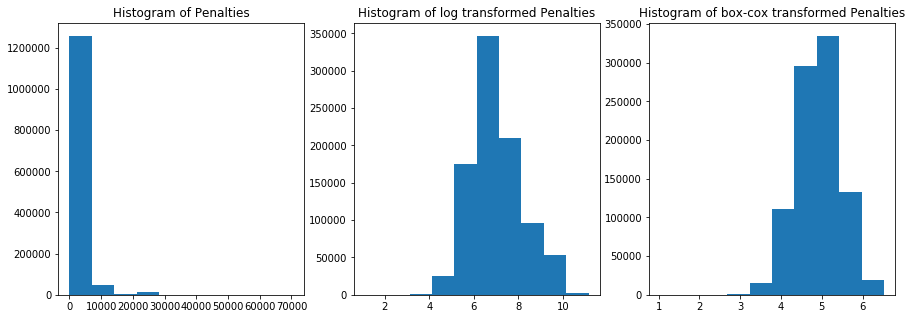

In [72]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(dob["penalty_imposed"])
plt.title("Histogram of Penalties")

plt.subplot(1,3,2)
plt.hist(np.log(dob2["penalty_imposed"]))
plt.title("Histogram of log transformed Penalties")

plt.subplot(1,3,3)
plt.hist(penalty_imposed)
plt.title("Histogram of box-cox transformed Penalties")
plt.show()

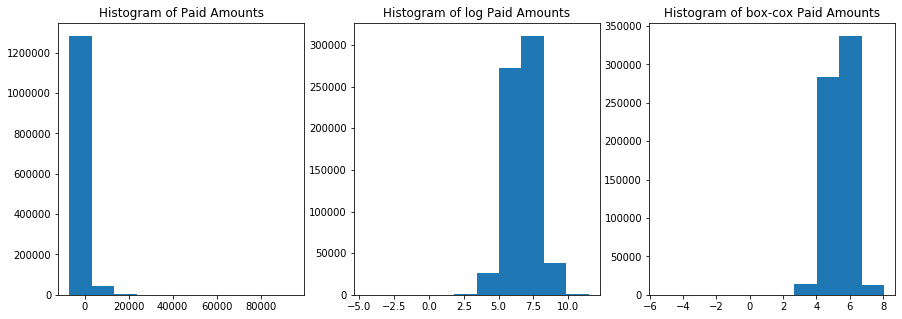

In [73]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(dob["amount_paid"])
plt.title("Histogram of Paid Amounts")

plt.subplot(1,3,2)
plt.hist(np.log(dob3["amount_paid"]))
plt.title("Histogram of log Paid Amounts")

plt.subplot(1,3,3)
plt.hist(amount_paid)
plt.title("Histogram of box-cox Paid Amounts")
plt.show()

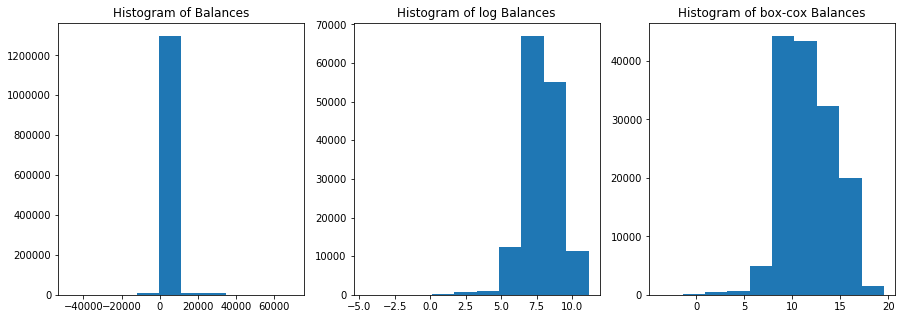

In [74]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(dob["balance_due"])
plt.title("Histogram of Balances")

plt.subplot(1,3,2)
plt.hist(np.log(dob4["balance_due"]))
plt.title("Histogram of log Balances")

plt.subplot(1,3,3)
plt.hist(balance_due)
plt.title("Histogram of box-cox Balances")
plt.show()

In order to keep the most data with a normal distribution we will use all variables with a penalty imposed value greater than zero. We will then perform a box_cox transformation on our target.

In [75]:
dob = dob.loc[dob['penalty_imposed']>0]
dob.shape

(910111, 16)

In [76]:
penalty_imposed_box_cox,_ = boxcox(dob['penalty_imposed'])
dob['box_cox_penalty'] = penalty_imposed_box_cox

In [77]:
dob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910111 entries, 0 to 1326588
Data columns (total 17 columns):
ecb_violation_status    910111 non-null int64
boro                    910111 non-null int64
hearing_date            910111 non-null datetime64[ns]
hearing_time            910111 non-null int64
served_date             910111 non-null datetime64[ns]
issue_date              910111 non-null datetime64[ns]
severity                910111 non-null object
violation_type          910111 non-null object
respondent_name         910111 non-null object
respondent_city         910111 non-null object
penalty_imposed         910111 non-null float64
amount_paid             910111 non-null float64
balance_due             910111 non-null float64
aggravated_level        910111 non-null object
hearing_status          910111 non-null object
certification_status    910111 non-null object
box_cox_penalty         910111 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(3), object(7)
memor

In [78]:
#since we will use penalty imposed as our target, we will drop the non-transformed version
dob = dob.drop('penalty_imposed', axis=1)

## Checking additional outliers

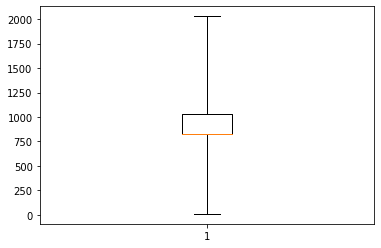

In [79]:
plt.boxplot(dob.hearing_time, whis=20)
plt.show()

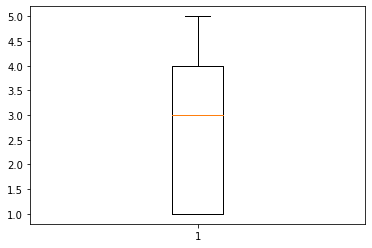

In [80]:
plt.boxplot(dob.boro)
plt.show()

# Feature Engineering

## Target Variable
The target variable will be penalty imposed. We want to see if based on our features our model can predict how much a respondent will owe for a penalty.

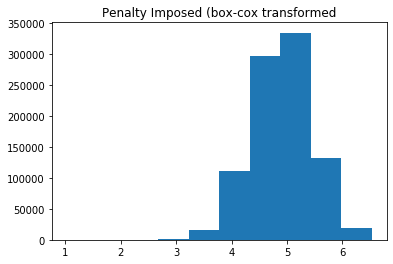

In [81]:
plt.hist(dob.box_cox_penalty)
plt.title("Penalty Imposed (box-cox transformed")
plt.show()

## New Features

### Served Date vs. the date issued
This issue date and the date the respondent is served should be within 24 hours and not exceeding 30 days.

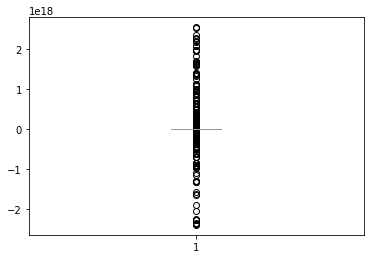

In [82]:
dob['served_vs_issue'] = dob['served_date'] - dob['issue_date']
plt.boxplot(dob.served_vs_issue, whis=20)
plt.show()

There are a lot of outliers here. 

In [83]:
#will convert the "days" to a number
dob['served_vs_issue'] = dob.served_vs_issue.dt.days
dob.served_vs_issue.describe()

count    910111.000000
mean          8.718131
std         179.795572
min      -27731.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       29585.000000
Name: served_vs_issue, dtype: float64

In [84]:
#We want to keep as many outliers as possible, but some are clearly data entry errors.
#Here I only keep the the dates that are 10 years before and after 
dob = dob.loc[(dob['served_vs_issue'] <= 3650) & (dob['served_vs_issue']> -3650)]
dob = dob.reset_index(drop=True)
dob.shape

(909938, 17)

In [85]:
dob.served_vs_issue.describe()

count    909938.000000
mean          8.248796
std          43.323238
min       -3634.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3649.000000
Name: served_vs_issue, dtype: float64

### Hearing times

In [86]:
#create a variable to see if it is morning or afternoon (1- afternoon, 0-morning)
dob['hearing_time_morning_v_afternoon']= np.where((dob['hearing_time']>=1230) | (dob['hearing_time']<= 730), 1, 0)

In [87]:
dob.hearing_time_morning_v_afternoon.value_counts()

0    886342
1     23596
Name: hearing_time_morning_v_afternoon, dtype: int64

### Date issued vs. the hearing date
How many days between the date violation was originally issued and the hearing date

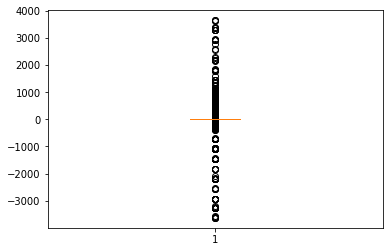

In [88]:
dob['issue_vs_hearing'] = dob['hearing_date'] - dob['issue_date']
plt.boxplot(dob.served_vs_issue, whis=20)
plt.show()

In [89]:
#convert the 'days' to numeric
dob['issue_vs_hearing'] = dob.issue_vs_hearing.dt.days
dob.issue_vs_hearing.describe()

count    909938.000000
mean        154.213843
std         208.931132
min        -226.000000
25%          51.000000
50%          85.000000
75%         180.000000
max        7752.000000
Name: issue_vs_hearing, dtype: float64

In [90]:
#keep dates between 10 years
#only one variable was < -50; drop it
dob = dob.loc[(dob['issue_vs_hearing']< 3650) & (dob['issue_vs_hearing']>-50)]
dob.shape

(909890, 19)

In [91]:
dob.issue_vs_hearing.describe()

count    909890.000000
mean        153.986669
std         206.367082
min           0.000000
25%          51.000000
50%          85.000000
75%         180.000000
max        3632.000000
Name: issue_vs_hearing, dtype: float64

## Engineering categorical variables
Looking at our categorical variables and trying to limit or combine values

#### Violation Type

In [92]:
dob.violation_type.value_counts()

Construction           531315
Elevators              114740
Unknown                 80009
Quality of Life         41739
Boilers                 34775
Site Safety             23703
Local Law               23603
Plumbing                15068
Zoning                  12652
Signs                    9846
HPD                      6990
Cranes and Derricks      6966
Public Assembly          6439
Administrative           1966
Padlock                    79
Name: violation_type, dtype: int64

In [93]:
dob['violation_type_encoded'] = dob.groupby('violation_type')['box_cox_penalty'].transform('mean')
dob.violation_type_encoded.describe()

count    909890.000000
mean          4.911086
std           0.200724
min           4.215852
25%           4.975553
50%           4.975553
75%           4.975553
max           5.365050
Name: violation_type_encoded, dtype: float64

In [94]:
dob.groupby('violation_type')['box_cox_penalty'].mean()

violation_type
Administrative         4.884160
Boilers                4.537297
Construction           4.975553
Cranes and Derricks    5.206432
Elevators              4.524781
HPD                    4.891868
Local Law              4.999797
Padlock                4.625122
Plumbing               4.834344
Public Assembly        4.215852
Quality of Life        5.185151
Signs                  5.365050
Site Safety            4.879781
Unknown                5.077071
Zoning                 4.619830
Name: box_cox_penalty, dtype: float64

### Hearing Status

In [95]:
dob.hearing_status.value_counts()

IN VIOLATION          520562
WRITTEN OFF           132175
DEFAULT               123635
STIPULATION/IN-VIO     81280
PENDING                37312
ADMIT/IN-VIO           13187
POP/IN-VIO               895
CURED/IN-VIO             598
DISMISSED                246
Name: hearing_status, dtype: int64

In [96]:
dob['hearing_status'] = dob['hearing_status'].replace((
    'STIPULATION/IN-VIO', 'ADMIT/IN-VIO', 'POP/IN-VIO', 'CURED/IN-VIO'),
    'IN VIOLATION').replace('DISMISSED', 'WRITTEN OFF')


In [97]:
dob = dob.loc[dob['hearing_status']!= "PENDING"]
dob = dob.reset_index(drop=True)

In [98]:
dob.hearing_status.value_counts()

IN VIOLATION    616522
WRITTEN OFF     132421
DEFAULT         123635
Name: hearing_status, dtype: int64

### Certification Status

In [99]:
dob.certification_status.value_counts()

CERTIFICATE ACCEPTED                     624299
NO COMPLIANCE RECORDED                   238721
CERTIFICATE DISAPPROVED                    4350
COMPLIANCE-INSP/DOC                        2260
CERTIFICATE PENDING                        1374
REINSPECTION SHOWS VIOLATION GOOD           697
CURE ACCEPTED                               600
DISMISSED                                   244
REINSPECTION SHOWS STILL IN VIOLATION        33
Name: certification_status, dtype: int64

In [100]:
dob['certification_status'] = dob['certification_status'].replace((
    "CERTIFICATE DISAPPROVED", "REINSPECTION SHOWS STILL IN VIOLATION"
), 'NO COMPLIANCE RECORDED')

dob['certification_status'] = dob['certification_status'].replace((
    "CERTIFICATE ACCEPTED", "COMPLIANCE-INSP/DOC", "CERTIFICATE PENDING", "REINSPECTION SHOWS VIOLATION GOOD", "CURE ACCEPTED"
), 'COMPLIANCE ACCEPTED')    

In [101]:
dob.certification_status.value_counts()

COMPLIANCE ACCEPTED       629230
NO COMPLIANCE RECORDED    243104
DISMISSED                    244
Name: certification_status, dtype: int64

In [102]:
dob = dob.loc[dob['certification_status']!= 'DISMISSED']
dob = dob.reset_index(drop=True)
dob.shape

(872334, 20)

### Aggravated Level

In [103]:
dob.aggravated_level.value_counts()

NO                            802903
AGGRAVATED OFFENSE LEVEL 1     39590
MULTIPLE OFFENSE               23274
AGGRAVATED OFFENSE LEVEL 2      6567
Name: aggravated_level, dtype: int64

In [104]:
dob['aggravated_level'] = dob['aggravated_level'].replace((
    "AGGRAVATED OFFENSE LEVEL 1", "MULTIPLE OFFENSE","AGGRAVATED OFFENSE LEVEL 2",
),'YES')

In [105]:
dob['aggravated_level'] = dob['aggravated_level'].replace('NO', 0).replace('YES', 1)
dob.aggravated_level.value_counts()

0    802903
1     69431
Name: aggravated_level, dtype: int64

### Severity

In [106]:
dob.severity.value_counts()

Unknown          506440
Non-Hazardous    232800
Hazardous        133094
Name: severity, dtype: int64

In [107]:
dob['severity'] = np.where(dob['severity']== 'Hazardous', 1,0)
dob.severity.value_counts()

0    739240
1    133094
Name: severity, dtype: int64

### Respondent City
There are so many different cities in the respondent category. I transformed this variable into something our model could use encoding it with a continuous variable's mean.

In [108]:
dob['respondent_city'] = dob.groupby('respondent_city')['box_cox_penalty'].transform('mean')
dob.respondent_city.describe()

count    872334.000000
mean          4.895254
std           0.104223
min           2.724323
25%           4.785049
50%           4.927615
75%           4.944739
max           6.226896
Name: respondent_city, dtype: float64

### Respondent Name
Similarly to above, I have encoded these with the balance due amount

In [109]:
dob['respondent_name'] = dob.groupby('respondent_name')['box_cox_penalty'].transform('mean')
dob.respondent_name.describe()

count    872334.000000
mean          4.895254
std           0.486773
min           1.036667
25%           4.545668
50%           4.887394
75%           5.213670
max           6.522038
Name: respondent_name, dtype: float64

### Dates

#### Date Served

In [110]:
dob['served_date_year'] = dob['served_date'].dt.year
dob['served_date_month'] = dob['served_date'].dt.month
dob['served_date_week'] = dob['served_date'].dt.week
dob['served_date_day'] = dob['served_date'].dt.day
dob['served_date_dayofweek'] = dob['served_date'].dt.dayofweek

In [111]:
print(dob.served_date_year.value_counts())
print(dob.served_date_month.value_counts())
print(dob.served_date_week.value_counts())
print(dob.served_date_day.value_counts())
print(dob.served_date_dayofweek.value_counts())

2018    58659
2017    54464
2009    52699
2008    52376
2019    51832
2010    45974
2016    42160
2007    41230
2011    38061
2015    36751
2014    35488
2006    34515
2005    31199
2012    30622
2013    29869
2004    28436
2003    26337
2002    23210
2001    22890
2000    20426
1999    18442
1998    18102
1991    15771
1997    10332
1990     8667
1989     7997
1995     6417
1996     5847
1993     5846
1992     5655
1988     5503
1994     4597
2020     1954
1986        2
1982        2
1987        1
1981        1
Name: served_date_year, dtype: int64
8     79219
10    77591
3     75794
6     75657
4     75518
7     75480
9     72981
5     72883
1     68472
12    68195
2     65482
11    65062
Name: served_date_month, dtype: int64
40    18292
38    18250
31    18229
33    18159
29    18155
39    18087
14    18069
30    18023
44    17996
19    17872
43    17871
32    17799
28    17750
37    17735
26    17728
16    17688
9     17652
34    17640
24    17578
25    17565
17    17564
2     17553

#### Hearing Date

In [112]:
dob['hearing_date_year'] = dob['hearing_date'].dt.year
dob['hearing_date_month'] = dob['hearing_date'].dt.month
dob['hearing_date_week'] = dob['hearing_date'].dt.week
dob['hearing_date_day'] = dob['hearing_date'].dt.day
dob['hearing_date_dayofweek'] = dob['hearing_date'].dt.dayofweek


In [113]:
print(dob.hearing_date_year.value_counts())
print(dob.hearing_date_month.value_counts())
print(dob.hearing_date_week.value_counts())
print(dob.hearing_date_day.value_counts())
print(dob.hearing_date_dayofweek.value_counts())

2018    58832
2019    54785
2010    53648
2009    52167
2017    47291
2011    46690
2008    45746
2016    39988
2015    37099
2007    36932
2012    33924
2014    33414
2006    31827
2013    29949
2005    28994
2004    28046
2003    25880
2002    22753
2001    22060
2020    18522
2000    18056
1999    17672
1998    16018
1991    14181
1989     8464
1990     7905
1992     7761
1997     7291
1996     6401
1993     5953
1995     5805
1994     4807
1988     3374
2021       99
Name: hearing_date_year, dtype: int64
3     77594
8     77251
6     76585
5     75165
10    74072
7     72952
1     72137
12    71909
4     71691
9     70867
11    66613
2     65498
Name: hearing_date_month, dtype: int64
5     19125
49    19099
9     19017
51    18941
38    18399
33    18309
20    18236
50    18210
23    18072
19    17962
18    17959
44    17943
21    17890
24    17888
29    17888
10    17879
11    17815
40    17780
16    17690
25    17648
2     17637
6     17635
43    17626
26    17584
31    17557
32 

In [114]:
dob['issue_date_year'] = dob['issue_date'].dt.year
dob['issue_date_month'] = dob['issue_date'].dt.month
dob['issue_date_week'] = dob['issue_date'].dt.week
dob['issue_date_day'] = dob['issue_date'].dt.day
dob['issue_date_dayofweek'] = dob['issue_date'].dt.dayofweek

In [115]:
print(dob.issue_date_year.value_counts())
print(dob.issue_date_month.value_counts())
print(dob.issue_date_week.value_counts())
print(dob.issue_date_day.value_counts())
print(dob.issue_date_dayofweek.value_counts())

2018    59267
2017    54496
2008    53798
2009    52615
2019    50345
2010    45083
2016    42085
2007    41020
2011    37996
2015    37010
2014    35814
2006    35054
2005    31425
2012    30228
2013    29746
2004    28076
2003    26310
2002    23455
2001    22901
2000    19976
1999    18827
1998    17244
1991    14808
1997    11178
1990     9546
1989     8056
1995     6435
1993     5819
1992     5760
1996     5704
1988     5498
1994     4798
2020     1847
1987      110
1980        2
1986        1
1985        1
Name: issue_date_year, dtype: int64
8     78728
10    78223
3     76255
6     75886
4     74896
5     74705
7     74557
9     72627
1     69158
12    67962
11    65414
2     63923
Name: issue_date_month, dtype: int64
40    18740
25    18454
20    18452
28    18143
32    18106
33    18065
37    18052
39    18009
50    17899
11    17897
44    17875
29    17849
30    17841
17    17840
31    17794
15    17781
43    17659
42    17643
34    17563
38    17560
49    17552
19    17545
1

# Making Visuals and Correlations

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


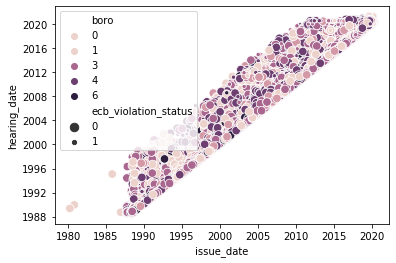

In [116]:
sns.scatterplot(x='issue_date', y='hearing_date', hue='boro', size='ecb_violation_status', data=dob)

In [117]:
dob.corr()

,ecb_violation_status,boro,hearing_time,severity,respondent_name,respondent_city,amount_paid,balance_due,aggravated_level,box_cox_penalty,served_vs_issue,hearing_time_morning_v_afternoon,issue_vs_hearing,violation_type_encoded,served_date_year,served_date_month,served_date_week,served_date_day,served_date_dayofweek,hearing_date_year,hearing_date_month,hearing_date_week,hearing_date_day,hearing_date_dayofweek,issue_date_year,issue_date_month,issue_date_week,issue_date_day,issue_date_dayofweek
ecb_violation_status,1.000000,0.119507,-0.028669,-0.053419,0.219586,0.117254,-0.077907,0.244453,0.077301,0.209151,0.019105,0.027506,0.007323,0.092958,0.170336,0.011184,0.009615,-0.004811,0.029793,0.171453,-0.006638,-0.007124,-0.008875,-0.061386,0.169840,0.014762,0.013419,-0.003164,0.030841
boro,0.119507,1.000000,-0.107709,0.065717,0.083299,0.336463,-0.028604,0.064909,0.016961,0.073007,-0.043019,-0.031728,0.041368,0.176421,0.030767,0.005088,0.003811,-0.006376,0.055178,0.034643,0.003827,0.004311,-0.025610,-0.601359,0.031425,0.004910,0.003207,-0.007385,0.051338
hearing_time,-0.028669,-0.107709,1.000000,0.050474,-0.037303,-0.039950,-0.037008,-0.020733,-0.011400,-0.031911,0.001486,0.327402,-0.107443,-0.080845,-0.066855,-0.010708,-0.009874,0.004006,-0.017294,-0.075475,0.003112,0.004922,0.010794,0.046585,-0.066850,-0.010934,-0.009997,0.006433,-0.014486
severity,-0.053419,0.065717,0.050474,1.000000,0.022102,0.038179,-0.002516,-0.091322,0.010622,0.037529,0.004101,-0.020177,0.101362,0.114032,-0.343874,-0.013582,-0.012763,0.008881,0.036716,-0.337502,0.005812,0.007101,0.002567,-0.064295,-0.343667,-0.016857,-0.016136,0.004529,0.037405
respondent_name,0.219586,0.083299,-0.037303,0.022102,1.000000,0.201560,0.231691,0.352707,0.251592,0.867821,0.026860,-0.016255,0.019358,0.364294,0.405988,0.007677,0.006636,-0.003004,0.065129,0.407795,-0.000815,-0.001803,-0.000923,-0.072936,0.405370,0.009068,0.007822,-0.004739,0.073125
respondent_city,0.117254,0.336463,-0.039950,0.038179,0.201560,1.000000,0.015425,0.113852,0.048299,0.185809,-0.025331,-0.009515,0.019018,0.167339,0.124583,0.006029,0.005508,-0.003760,0.047673,0.126632,0.001365,0.002704,0.018179,-0.282451,0.124928,0.005897,0.005313,-0.004093,0.045486
amount_paid,-0.077907,-0.028604,-0.037008,-0.002516,0.231691,0.015425,1.000000,-0.121343,0.111889,0.335804,0.048422,-0.028327,0.023953,0.167913,0.129151,-0.003406,-0.002873,0.002388,0.016961,0.130183,0.000972,0.001173,0.001087,0.019612,0.128352,-0.003028,-0.003015,-0.000614,0.020471
balance_due,0.244453,0.064909,-0.020733,-0.091322,0.352707,0.113852,-0.121343,1.000000,0.272980,0.399358,-0.007390,0.046606,-0.023354,0.097639,0.217294,0.009352,0.008574,-0.004995,0.032429,0.216642,-0.010028,-0.011296,-0.006570,-0.030880,0.217364,0.008423,0.007518,-0.007384,0.035027
aggravated_level,0.077301,0.016961,-0.011400,0.010622,0.251592,0.048299,0.111889,0.272980,1.000000,0.305108,0.014664,0.023429,0.008931,0.056832,0.057897,-0.010060,-0.010907,-0.001769,0.038904,0.058419,-0.010037,-0.010442,-0.005342,-0.013195,0.057427,-0.003881,-0.005361,-0.003206,0.041744
box_cox_penalty,0.209151,0.073007,-0.031911,0.037529,0.867821,0.185809,0.335804,0.399358,0.305108,1.000000,0.032540,-0.010713,0.014388,0.356246,0.377770,0.007305,0.006574,-0.001983,0.062333,0.379098,-0.001171,-0.002482,-0.003504,-0.066097,0.377038,0.009682,0.008720,-0.003200,0.071141


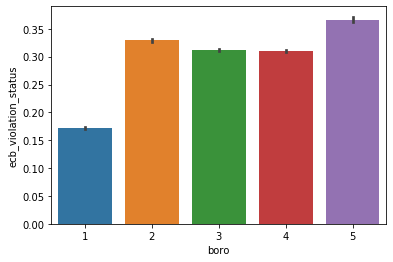

In [118]:
ax = sns.barplot(y="ecb_violation_status", x="boro", data=dob.loc[dob['violation_type']!= "Unknown"])

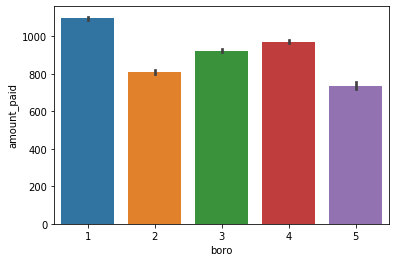

In [119]:
ax = sns.barplot(x="boro", y="amount_paid", data=dob)

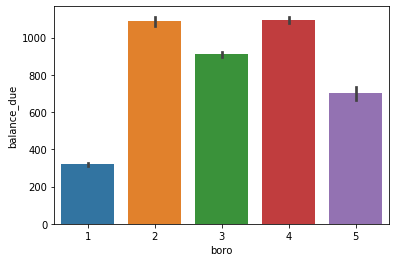

In [120]:
ax = sns.barplot(x="boro", y="balance_due", data=dob)

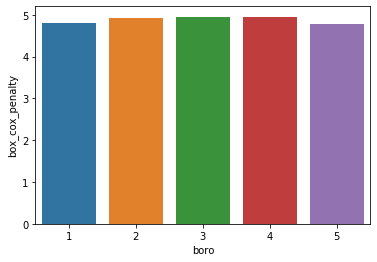

In [121]:
ax = sns.barplot(x="boro", y="box_cox_penalty", data=dob)

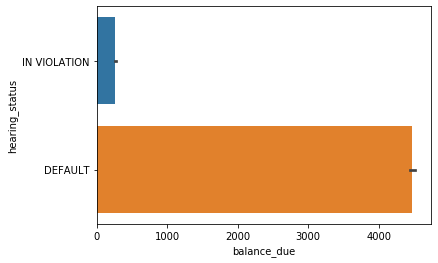

In [122]:
ax = sns.barplot(y="hearing_status", x="balance_due", data=dob.loc[dob['hearing_status']!= "WRITTEN OFF"])

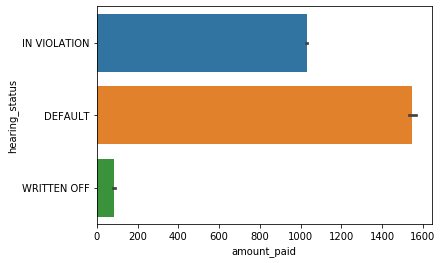

In [123]:
ax = sns.barplot(y="hearing_status", x="amount_paid", data=dob)

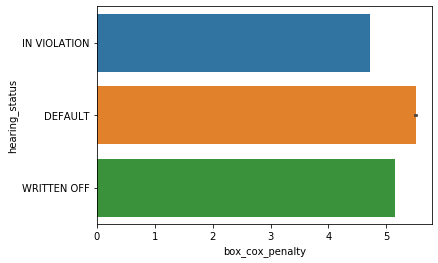

In [124]:
ax = sns.barplot(y="hearing_status", x="box_cox_penalty", data=dob)

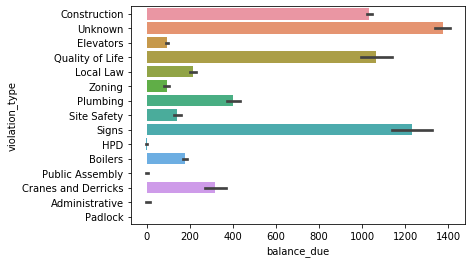

In [125]:
ax = sns.barplot(y="violation_type", x="balance_due", data=dob)

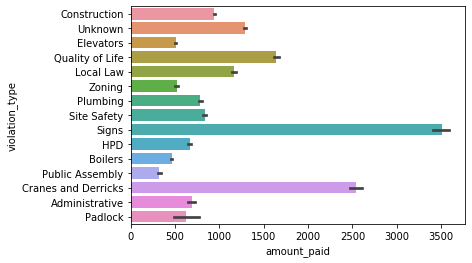

In [126]:
ax = sns.barplot(y="violation_type", x="amount_paid", data=dob)

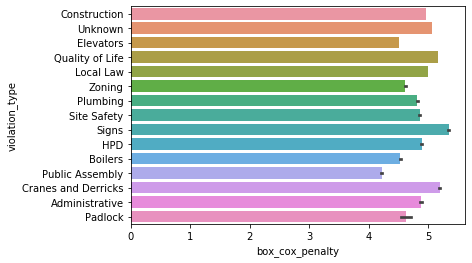

In [127]:
ax = sns.barplot(y="violation_type", x="box_cox_penalty", data=dob)


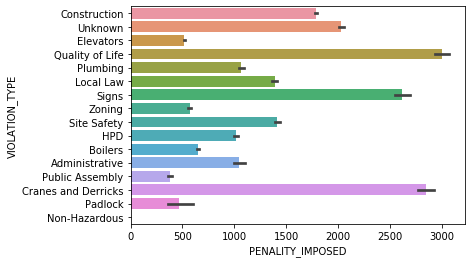

In [128]:
ax = sns.barplot(y="VIOLATION_TYPE", x="PENALITY_IMPOSED", data=dob_Restore)

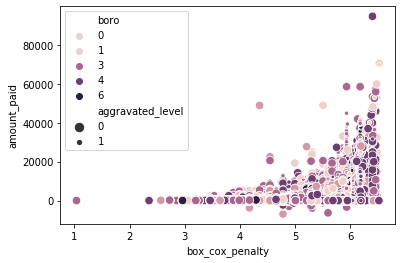

In [129]:
sns.scatterplot(y="amount_paid", x="box_cox_penalty", hue='boro', size='aggravated_level', data=dob)

                                  ecb_violation_status      boro  \
ecb_violation_status                          1.000000  0.119507   
boro                                          0.119507  1.000000   
hearing_time                                 -0.028669 -0.107709   
severity                                     -0.053419  0.065717   
respondent_name                               0.219586  0.083299   
respondent_city                               0.117254  0.336463   
amount_paid                                  -0.077907 -0.028604   
balance_due                                   0.244453  0.064909   
aggravated_level                              0.077301  0.016961   
box_cox_penalty                               0.209151  0.073007   
served_vs_issue                               0.019105 -0.043019   
hearing_time_morning_v_afternoon              0.027506 -0.031728   
issue_vs_hearing                              0.007323  0.041368   
violation_type_encoded                        0.

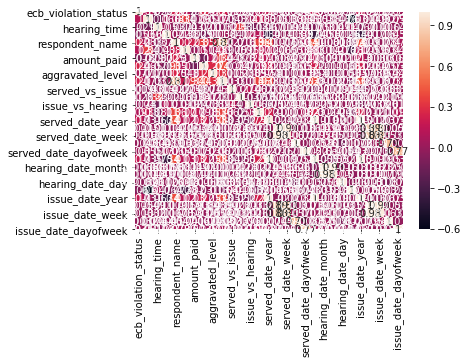

In [130]:
print(dob.corr())
sns.heatmap(dob.corr(),annot=True)
plt.show()

In [131]:
dob.describe(include='all')

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,amount_paid,balance_due,aggravated_level,hearing_status,certification_status,box_cox_penalty,served_vs_issue,hearing_time_morning_v_afternoon,issue_vs_hearing,violation_type_encoded,served_date_year,served_date_month,served_date_week,served_date_day,served_date_dayofweek,hearing_date_year,hearing_date_month,hearing_date_week,hearing_date_day,hearing_date_dayofweek,issue_date_year,issue_date_month,issue_date_week,issue_date_day,issue_date_dayofweek
count,872334.000000,872334.000000,872334,872334.000000,872334,872334,872334.000000,872334,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334,872334,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.000000,872334.0000,872334.000000,872334.000000,872334.000000
unique,NaN,NaN,7892,NaN,11202,11231,NaN,15,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2020-02-13 00:00:00,NaN,2008-02-27 00:00:00,2017-06-20 00:00:00,NaN,Construction,NaN,NaN,NaN,NaN,NaN,IN VIOLATION,COMPLIANCE ACCEPTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,613,NaN,508,1394,NaN,503773,NaN,NaN,NaN,NaN,NaN,616522,629230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,1988-06-06 00:00:00,NaN,1981-09-18 00:00:00,1980-03-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-04-29 00:00:00,NaN,2020-05-07 00:00:00,2020-05-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.279215,2.700259,NaN,910.428940,NaN,NaN,0.152572,NaN,4.895254,4.895254,959.912667,821.111479,0.079592,NaN,NaN,4.895254,8.282970,0.025366,151.314878,4.909503,2008.634261,6.506820,26.504018,15.752439,2.293059,2009.027707,6.489326,26.440507,15.615558,1.825072,2008.611550,6.5077,26.509135,15.739122,2.292444
std,0.448614,1.235643,NaN,121.772265,NaN,NaN,0.359575,NaN,0.486773,0.104223,1898.917573,3673.890701,0.270661,NaN,NaN,0.560914,43.180047,0.157236,208.427394,0.202417,7.684465,3.379808,14.752153,8.740444,1.593577,7.675470,3.413055,14.870606,8.703563,1.428837,7.687496,3.3797,14.746073,8.708515,1.596512
min,0.000000,1.000000,NaN,9.000000,NaN,NaN,0.000000,NaN,1.036667,2.724323,-6915.480000,-47400.000000,0.000000,NaN,NaN,1.036667,-3634.000000,0.000000,0.000000,4.215852,1981.000000,1.000000,1.000000,1.000000,0.000000,1988.000000,1.000000,1.000000,1.000000,0.000000,1980.000000,1.0000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,NaN,830.000000,NaN,NaN,0.000000,NaN,4.545668,4.785049,0.000000,0.000000,0.000000,NaN,NaN,4.543129,0.000000,0.000000,51.000000,4.975553,2004.000000,4.000000,14.000000,8.000000,1.000000,2004.000000,4.000000,14.000000,8.000000,1.000000,2004.000000,4.0000,14.000000,8.000000,1.000000


In [132]:
#png image found here: https://svgfree.blogspot.com/2015/06/new-york-city-skyline-silhouette-free.html

#from wordcloud import WordCloud
#from os import path
#from PIL import Image
#import os

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#building_mask = np.array(Image.open(path("New York City silhouette.png")))
# Generate a word cloud image
#wc = WordCloud(background_color= "white", mask= building_mask, contour_color='steelblue').generate(" ".join(dob["violation_type"].unique()))


# store to file
#wc.to_file(path.join(d, "New York City silhouette.png"))

# Display the generated image:
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")

#plt.show()

TypeError: 'module' object is not callable

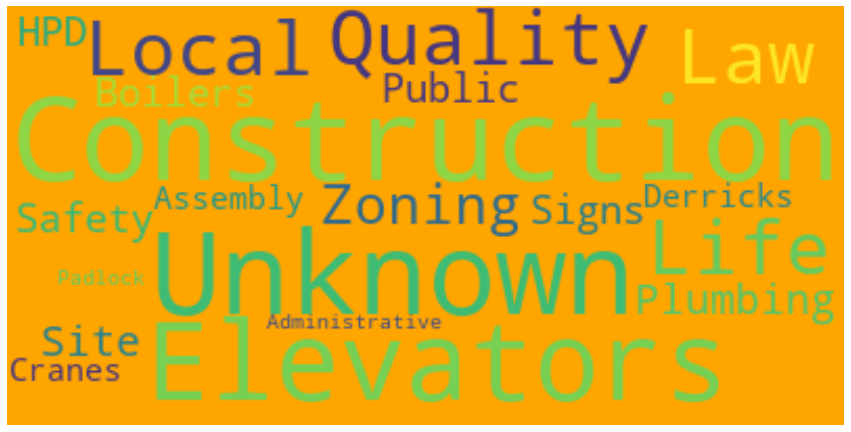

In [133]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(dob["violation_type"].unique()))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()


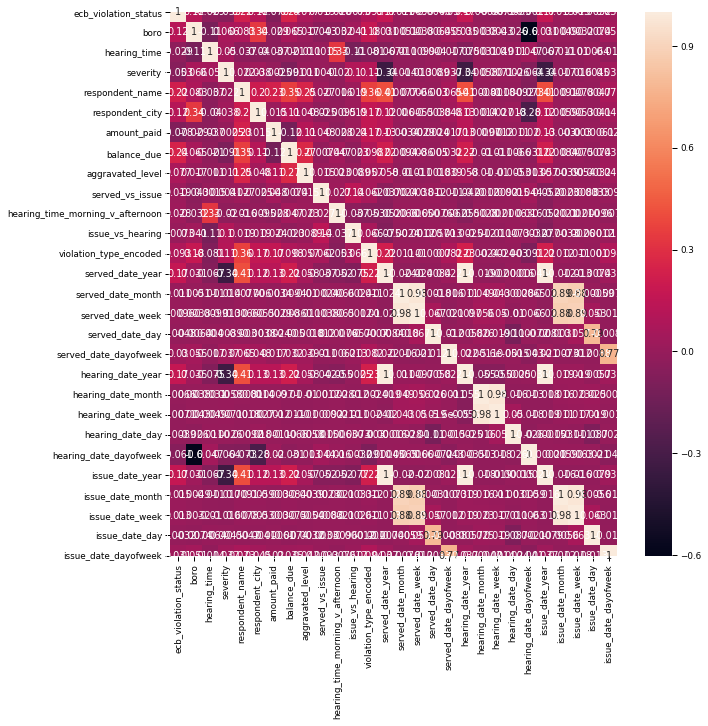

In [134]:
sns.set_context('paper')
plt.figure(figsize=(10,10))
corr = dob.drop('box_cox_penalty', axis=1).corr()
sns.heatmap(corr, annot=True)

In [135]:

corr

,ecb_violation_status,boro,hearing_time,severity,respondent_name,respondent_city,amount_paid,balance_due,aggravated_level,served_vs_issue,hearing_time_morning_v_afternoon,issue_vs_hearing,violation_type_encoded,served_date_year,served_date_month,served_date_week,served_date_day,served_date_dayofweek,hearing_date_year,hearing_date_month,hearing_date_week,hearing_date_day,hearing_date_dayofweek,issue_date_year,issue_date_month,issue_date_week,issue_date_day,issue_date_dayofweek
ecb_violation_status,1.000000,0.119507,-0.028669,-0.053419,0.219586,0.117254,-0.077907,0.244453,0.077301,0.019105,0.027506,0.007323,0.092958,0.170336,0.011184,0.009615,-0.004811,0.029793,0.171453,-0.006638,-0.007124,-0.008875,-0.061386,0.169840,0.014762,0.013419,-0.003164,0.030841
boro,0.119507,1.000000,-0.107709,0.065717,0.083299,0.336463,-0.028604,0.064909,0.016961,-0.043019,-0.031728,0.041368,0.176421,0.030767,0.005088,0.003811,-0.006376,0.055178,0.034643,0.003827,0.004311,-0.025610,-0.601359,0.031425,0.004910,0.003207,-0.007385,0.051338
hearing_time,-0.028669,-0.107709,1.000000,0.050474,-0.037303,-0.039950,-0.037008,-0.020733,-0.011400,0.001486,0.327402,-0.107443,-0.080845,-0.066855,-0.010708,-0.009874,0.004006,-0.017294,-0.075475,0.003112,0.004922,0.010794,0.046585,-0.066850,-0.010934,-0.009997,0.006433,-0.014486
severity,-0.053419,0.065717,0.050474,1.000000,0.022102,0.038179,-0.002516,-0.091322,0.010622,0.004101,-0.020177,0.101362,0.114032,-0.343874,-0.013582,-0.012763,0.008881,0.036716,-0.337502,0.005812,0.007101,0.002567,-0.064295,-0.343667,-0.016857,-0.016136,0.004529,0.037405
respondent_name,0.219586,0.083299,-0.037303,0.022102,1.000000,0.201560,0.231691,0.352707,0.251592,0.026860,-0.016255,0.019358,0.364294,0.405988,0.007677,0.006636,-0.003004,0.065129,0.407795,-0.000815,-0.001803,-0.000923,-0.072936,0.405370,0.009068,0.007822,-0.004739,0.073125
respondent_city,0.117254,0.336463,-0.039950,0.038179,0.201560,1.000000,0.015425,0.113852,0.048299,-0.025331,-0.009515,0.019018,0.167339,0.124583,0.006029,0.005508,-0.003760,0.047673,0.126632,0.001365,0.002704,0.018179,-0.282451,0.124928,0.005897,0.005313,-0.004093,0.045486
amount_paid,-0.077907,-0.028604,-0.037008,-0.002516,0.231691,0.015425,1.000000,-0.121343,0.111889,0.048422,-0.028327,0.023953,0.167913,0.129151,-0.003406,-0.002873,0.002388,0.016961,0.130183,0.000972,0.001173,0.001087,0.019612,0.128352,-0.003028,-0.003015,-0.000614,0.020471
balance_due,0.244453,0.064909,-0.020733,-0.091322,0.352707,0.113852,-0.121343,1.000000,0.272980,-0.007390,0.046606,-0.023354,0.097639,0.217294,0.009352,0.008574,-0.004995,0.032429,0.216642,-0.010028,-0.011296,-0.006570,-0.030880,0.217364,0.008423,0.007518,-0.007384,0.035027
aggravated_level,0.077301,0.016961,-0.011400,0.010622,0.251592,0.048299,0.111889,0.272980,1.000000,0.014664,0.023429,0.008931,0.056832,0.057897,-0.010060,-0.010907,-0.001769,0.038904,0.058419,-0.010037,-0.010442,-0.005342,-0.013195,0.057427,-0.003881,-0.005361,-0.003206,0.041744
served_vs_issue,0.019105,-0.043019,0.001486,0.004101,0.026860,-0.025331,0.048422,-0.007390,0.014664,1.000000,0.026723,0.137854,0.061950,-0.036708,0.002442,0.003769,0.012133,-0.011113,-0.041736,-0.001177,-0.000925,0.001517,0.044409,-0.051870,-0.002330,-0.000826,0.003259,0.009335


In [136]:
dob.nunique()

ecb_violation_status                    2
boro                                    5
hearing_date                         7892
hearing_time                          238
served_date                         11202
issue_date                          11231
severity                                2
violation_type                         15
respondent_name                     40162
respondent_city                      2507
amount_paid                         56223
balance_due                          9164
aggravated_level                        2
hearing_status                          3
certification_status                    2
box_cox_penalty                       781
served_vs_issue                       835
hearing_time_morning_v_afternoon        2
issue_vs_hearing                     2879
violation_type_encoded                 15
served_date_year                       37
served_date_month                      12
served_date_week                       53
served_date_day                   

In [137]:

#get dummies for some categorical variables
dob = pd.concat([dob, pd.get_dummies(dob[['hearing_status', 'certification_status']])], axis=1)
dob

,ecb_violation_status,boro,hearing_date,hearing_time,served_date,issue_date,severity,violation_type,respondent_name,respondent_city,amount_paid,balance_due,aggravated_level,hearing_status,certification_status,box_cox_penalty,served_vs_issue,hearing_time_morning_v_afternoon,issue_vs_hearing,violation_type_encoded,served_date_year,served_date_month,served_date_week,served_date_day,served_date_dayofweek,hearing_date_year,hearing_date_month,hearing_date_week,hearing_date_day,hearing_date_dayofweek,issue_date_year,issue_date_month,issue_date_week,issue_date_day,issue_date_dayofweek,hearing_status_DEFAULT,hearing_status_IN VIOLATION,hearing_status_WRITTEN OFF,certification_status_COMPLIANCE ACCEPTED,certification_status_NO COMPLIANCE RECORDED
0,0,1,2018-07-26,830,2018-06-07,2018-06-07,0,Construction,4.656749,4.785049,637.48,0.0,0,IN VIOLATION,COMPLIANCE ACCEPTED,4.656749,0,0,49,4.975553,2018,6,23,7,3,2018,7,30,26,3,2018,6,23,7,3,0,1,0,1,0
1,0,4,2010-05-25,1030,2010-04-01,2010-01-29,0,Unknown,5.504048,4.921490,937.89,0.0,0,DEFAULT,COMPLIANCE ACCEPTED,5.504048,62,0,116,5.077071,2010,4,13,1,3,2010,5,21,25,1,2010,1,4,29,4,1,0,0,1,0
2,0,2,2009-07-24,1030,2009-05-26,2009-05-26,0,Elevators,4.814061,4.785049,1000.00,0.0,0,IN VIOLATION,COMPLIANCE ACCEPTED,5.595060,0,0,59,4.524781,2009,5,22,26,1,2009,7,30,24,4,2009,5,22,26,1,0,1,0,1,0
3,0,1,2010-06-17,900,2008-05-27,2008-05-27,0,Construction,5.305115,4.785049,250.00,0.0,0,DEFAULT,COMPLIANCE ACCEPTED,5.305115,0,0,751,4.975553,2008,5,22,27,1,2010,6,24,17,3,2008,5,22,27,1,1,0,0,1,0
4,0,1,1999-10-07,830,1999-06-25,1991-06-25,0,Elevators,4.355806,4.785049,350.00,0.0,0,IN VIOLATION,COMPLIANCE ACCEPTED,4.355806,2922,0,3026,4.524781,1999,6,25,25,4,1999,10,40,7,3,1991,6,26,25,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872329,0,4,2020-07-21,1000,2019-09-26,2019-09-26,0,Cranes and Derricks,5.946870,4.947861,0.00,12500.0,0,DEFAULT,COMPLIANCE ACCEPTED,5.946870,0,0,299,5.206432,2019,9,39,26,3,2020,7,30,21,1,2019,9,39,26,3,1,0,0,1,0
872330,0,1,2020-03-19,1030,2019-06-05,2019-06-05,0,Cranes and Derricks,5.225723,4.785049,10000.00,0.0,0,IN VIOLATION,COMPLIANCE ACCEPTED,5.864335,0,0,288,5.206432,2019,6,23,5,2,2020,3,12,19,3,2019,6,23,5,2,0,1,0,1,0
872331,1,3,2018-04-06,1030,2017-11-28,2017-11-28,0,Boilers,4.172438,4.944739,255.18,0.0,0,IN VIOLATION,NO COMPLIANCE RECORDED,4.172438,0,0,129,4.537297,2017,11,48,28,1,2018,4,14,6,4,2017,11,48,28,1,0,1,0,0,1
872332,1,4,2020-01-28,830,2019-11-12,2019-10-30,0,Construction,5.088993,4.902295,2500.00,0.0,0,IN VIOLATION,NO COMPLIANCE RECORDED,5.305115,13,0,90,4.975553,2019,11,46,12,1,2020,1,5,28,1,2019,10,44,30,2,0,1,0,0,1


In [138]:
dob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872334 entries, 0 to 872333
Data columns (total 40 columns):
ecb_violation_status                           872334 non-null int64
boro                                           872334 non-null int64
hearing_date                                   872334 non-null datetime64[ns]
hearing_time                                   872334 non-null int64
served_date                                    872334 non-null datetime64[ns]
issue_date                                     872334 non-null datetime64[ns]
severity                                       872334 non-null int64
violation_type                                 872334 non-null object
respondent_name                                872334 non-null float64
respondent_city                                872334 non-null float64
amount_paid                                    872334 non-null float64
balance_due                                    872334 non-null float64
aggravated_level         

# Building The Model

## Import additional libraries

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor


## Feature selection and target variable

### Initial Model


In [140]:
features = dob.drop(['hearing_date', 'issue_date', 'served_date', 'hearing_status', 
             'certification_status', 'violation_type', 'box_cox_penalty'], axis=1)
X= features
y = dob['box_cox_penalty']

In [141]:
#inital model split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 697867
The number of observations in test set is 174467


### Second Model

In [143]:
features2 = dob.drop(['hearing_date', 'issue_date', 'served_date', 'hearing_status', 
             'certification_status', 'violation_type', 'box_cox_penalty', 'respondent_name', 
             'respondent_city', 'hearing_time_morning_v_afternoon', 'served_date_week', 'issue_date_week' ], axis=1)
X2= features2

In [144]:
#second model split into training and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [145]:
print("The number of observations in training set is {}".format(X_train2.shape[0]))
print("The number of observations in test set is {}".format(X_test2.shape[0]))

The number of observations in training set is 697867
The number of observations in test set is 174467


### Third Model

In [146]:
features3 = dob[['ecb_violation_status', 'amount_paid', 'balance_due', 'aggravated_level', 
                'hearing_status_DEFAULT', 'hearing_status_IN VIOLATION', 'hearing_status_WRITTEN OFF', 
                'certification_status_COMPLIANCE ACCEPTED', 'certification_status_NO COMPLIANCE RECORDED',
                'served_date_month', 'issue_date_month', 'hearing_date_month', 'severity', 
                'hearing_time_morning_v_afternoon', 'respondent_city', 'issue_vs_hearing', 
                'violation_type_encoded']]
X3 = features3

In [147]:
#second model split into training and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)

In [148]:
print("The number of observations in training set is {}".format(X_train3.shape[0]))
print("The number of observations in test set is {}".format(X_test3.shape[0]))

The number of observations in training set is 697867
The number of observations in test set is 174467


## OLS & Linear Regression Model

### First Model

In [149]:
X_train_sm = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train_sm).fit()

# We print the summary results
print(results.summary())

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        box_cox_penalty   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 1.022e+05
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:29:14   Log-Likelihood:                 10803.
No. Observations:              697867   AIC:                        -2.154e+04
Df Residuals:                  697835   BIC:                        -2.118e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [150]:
 #Linear Regression model
 
 lrm = LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X_train, y_train)
# Predicting
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8194800859768498
-----Test set statistics-----
R-squared of the model in test set is: 0.8191311236234488
Mean absolute error of the prediction is: 0.1690409666140783
Mean squared error of the prediction is: 0.057029389416698655
Root mean squared error of the prediction is: 0.23880826915477332
Mean absolute percentage error of the prediction is: 3.4979926117018723


### Second Model

In [151]:
X_train_sm2 = sm.add_constant(X_train2)

# We fit an OLS model using statsmodels
results2 = sm.OLS(y_train2, X_train_sm2).fit()

# We print the summary results
print(results2.summary())

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        box_cox_penalty   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 4.922e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:29:18   Log-Likelihood:            -2.2309e+05
No. Observations:              697867   AIC:                         4.462e+05
Df Residuals:                  697840   BIC:                         4.466e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [152]:
 #Linear Regression model
 
 lrm2 = LinearRegression()

# fit method estimates the coefficients using OLS
lrm2.fit(X_train2, y_train2)
# Predicting
y_preds_train2 = lrm2.predict(X_train2)
y_preds_test2 = lrm2.predict(X_test2)

print("R-squared of the model in training set is: {}".format(lrm2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))

R-squared of the model in training set is: 0.647108251108907
-----Test set statistics-----
R-squared of the model in test set is: 0.6447704089671334
Mean absolute error of the prediction is: 0.25683778367385374
Mean squared error of the prediction is: 0.11200670389067761
Root mean squared error of the prediction is: 0.3346740263161717
Mean absolute percentage error of the prediction is: 5.393111584794506


### Third Model

In [153]:
X_train_sm3 = sm.add_constant(X_train3)

# We fit an OLS model using statsmodels
results3 = sm.OLS(y_train3, X_train_sm3).fit()

# We print the summary results
print(results3.summary())

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        box_cox_penalty   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 6.101e+04
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:29:21   Log-Likelihood:            -2.9419e+05
No. Observations:              697867   AIC:                         5.884e+05
Df Residuals:                  697851   BIC:                         5.886e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [154]:
 #Linear Regression model
 
 lrm3 = LinearRegression()

# fit method estimates the coefficients using OLS
lrm3.fit(X_train3, y_train3)
# Predicting
y_preds_train3 = lrm3.predict(X_train3)
y_preds_test3 = lrm3.predict(X_test3)

print("R-squared of the model in training set is: {}".format(lrm3.score(X_train3, y_train3)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm3.score(X_test3, y_test3)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test3, y_preds_test3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test3, y_preds_test3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test3, y_preds_test3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test3 - y_preds_test3) / y_test3)) * 100))

R-squared of the model in training set is: 0.5673537181922885
-----Test set statistics-----
R-squared of the model in test set is: 0.564533000988403
Mean absolute error of the prediction is: 0.2908359215340711
Mean squared error of the prediction is: 0.13730619420143172
Root mean squared error of the prediction is: 0.3705485045192218
Mean absolute percentage error of the prediction is: 6.1359077833970606


## Decision Tree Regressor

### First Model

In [155]:
tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [156]:
y_preds_train = tree_regressor.predict(X_train)
y_preds_test = tree_regressor.predict(X_test)

print("R-squared of the model in training set is: {}".format(tree_regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(tree_regressor.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.998051982270915
-----Test set statistics-----
R-squared of the model in test set is: 0.9283721535029545
Mean absolute error of the prediction is: 0.037937398715102454
Mean squared error of the prediction is: 0.022584827377680926
Root mean squared error of the prediction is: 0.15028249191998688
Mean absolute percentage error of the prediction is: 0.757240251961772


In [157]:
cross_val_score(tree_regressor, X_train, y_train, cv=10)

array([0.92711846, 0.92748121, 0.92738123, 0.92790737, 0.92622019,
       0.92810125, 0.92611338, 0.93186723, 0.92863836, 0.92990304])

In [158]:
cross_val_score(tree_regressor, X_test, y_test, cv=10)

array([0.90856823, 0.90987766, 0.91397522, 0.9139058 , 0.91564014,
       0.91827077, 0.91043551, 0.9123509 , 0.91833619, 0.90859301])

### Second Model

In [159]:
tree_regressor2 = DecisionTreeRegressor()

tree_regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [160]:
y_preds_train2 = tree_regressor2.predict(X_train2)
y_preds_test2 = tree_regressor2.predict(X_test2)

print("R-squared of the model in training set is: {}".format(tree_regressor2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(tree_regressor2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))

R-squared of the model in training set is: 0.9932938351171251
-----Test set statistics-----
R-squared of the model in test set is: 0.8545392659789623
Mean absolute error of the prediction is: 0.06701397067685953
Mean squared error of the prediction is: 0.045864921657688025
Root mean squared error of the prediction is: 0.2141609713689402
Mean absolute percentage error of the prediction is: 1.3505587758368862


In [161]:
cross_val_score(tree_regressor2, X_train2, y_train2, cv=10)

array([0.85245673, 0.85070088, 0.84625867, 0.85166365, 0.84755806,
       0.85395532, 0.85046857, 0.85226358, 0.85550141, 0.84806825])

In [162]:
cross_val_score(tree_regressor2, X_test2, y_test2, cv=10)

array([0.82194115, 0.81988728, 0.81064014, 0.82236315, 0.82994135,
       0.82116941, 0.81715154, 0.81785596, 0.83094843, 0.81890706])

### Third Model

In [163]:
tree_regressor3 = DecisionTreeRegressor()

tree_regressor3.fit(X_train3, y_train3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [164]:
y_preds_train3 = tree_regressor3.predict(X_train3)
y_preds_test3 = tree_regressor3.predict(X_test3)

print("R-squared of the model in training set is: {}".format(tree_regressor3.score(X_train3, y_train3)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(tree_regressor3.score(X_test3, y_test3)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test3, y_preds_test3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test3, y_preds_test3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test3, y_preds_test3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test3 - y_preds_test3) / y_test3)) * 100))

R-squared of the model in training set is: 0.9787615299294657
-----Test set statistics-----
R-squared of the model in test set is: 0.8334665426002321
Mean absolute error of the prediction is: 0.07869889705631201
Mean squared error of the prediction is: 0.05250931825986526
Root mean squared error of the prediction is: 0.22914911795567808
Mean absolute percentage error of the prediction is: 1.5849402010834128


In [165]:
cross_val_score(tree_regressor3, X_train3, y_train3, cv=10)

array([0.82954572, 0.82862333, 0.82723361, 0.82659205, 0.82630805,
       0.8316609 , 0.8282524 , 0.83100045, 0.83208716, 0.82758143])

In [166]:
cross_val_score(tree_regressor3, X_test3, y_test3, cv=10)

array([0.79593802, 0.80173651, 0.79662734, 0.79904211, 0.80741479,
       0.7976488 , 0.80190902, 0.79624381, 0.79914331, 0.78890878])

## Random Forest

### First Model

In [167]:
rfr = RandomForestRegressor(n_estimators = 5, random_state = 42)

rfr.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [168]:
y_preds_train =rfr.predict(X_train)
y_preds_test = rfr.predict(X_test)

print("R-squared of the model in training set is: {}".format(rfr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rfr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9890186133389789
-----Test set statistics-----
R-squared of the model in test set is: 0.9540607680511973
Mean absolute error of the prediction is: 0.035863404873148756
Mean squared error of the prediction is: 0.014485003726445256
Root mean squared error of the prediction is: 0.12035366104296644
Mean absolute percentage error of the prediction is: 0.7161350452335847


In [169]:
cross_val_score(rfr, X_train, y_train, cv=5)

array([0.95279452, 0.9521393 , 0.95228654, 0.95287771, 0.95416034])

In [170]:
cross_val_score(rfr, X_test, y_test, cv=5)

array([0.94283126, 0.94454959, 0.94869039, 0.9459494 , 0.94595072])

### Second Model

In [171]:
rfr2 = RandomForestRegressor(n_estimators = 5, random_state = 42)

rfr2.fit(X_train2, y_train2)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [172]:
y_preds_train2 =rfr2.predict(X_train2)
y_preds_test2 = rfr2.predict(X_test2)

print("R-squared of the model in training set is: {}".format(rfr2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rfr2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))

R-squared of the model in training set is: 0.9752139173792642
-----Test set statistics-----
R-squared of the model in test set is: 0.903716450149654
Mean absolute error of the prediction is: 0.06356638057711828
Mean squared error of the prediction is: 0.030358965947274368
Root mean squared error of the prediction is: 0.17423824478935263
Mean absolute percentage error of the prediction is: 1.2828060081924542


In [173]:
cross_val_score(rfr2, X_train2, y_train2, cv=5)

array([0.90064439, 0.90010441, 0.9005883 , 0.90152637, 0.90184823])

In [174]:
cross_val_score(rfr2, X_test2, y_test2, cv=5)

array([0.88579143, 0.88623554, 0.89118134, 0.8872499 , 0.88963272])

### Third Model

In [175]:
rfr3 = RandomForestRegressor(n_estimators = 5, random_state = 42)

rfr3.fit(X_train3, y_train3)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [176]:
y_preds_train3 =rfr3.predict(X_train3)
y_preds_test3 = rfr3.predict(X_test3)

print("R-squared of the model in training set is: {}".format(rfr3.score(X_train3, y_train3)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rfr3.score(X_test3, y_test3)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test3, y_preds_test3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test3, y_preds_test3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test3, y_preds_test3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test3 - y_preds_test3) / y_test3)) * 100))

R-squared of the model in training set is: 0.9595982328470318
-----Test set statistics-----
R-squared of the model in test set is: 0.8778007781396073
Mean absolute error of the prediction is: 0.07484943400007853
Mean squared error of the prediction is: 0.0385303826147801
Root mean squared error of the prediction is: 0.1962915755063882
Mean absolute percentage error of the prediction is: 1.5075716742035123


In [177]:
cross_val_score(rfr3, X_train3, y_train3, cv=5)

array([0.87389958, 0.8731341 , 0.87544838, 0.87543928, 0.87577956])

In [178]:
cross_val_score(rfr3, X_test3, y_test3, cv=5)

array([0.85908867, 0.85924072, 0.8626774 , 0.86230254, 0.85946214])

## SVM- Linear Regression

### First Model

In [ ]:

svr = LinearSVR(max_iter=100, random_state=42)
svr.fit(X_train, y_train)

In [ ]:
y_preds_train =svr.predict(X_train)
y_preds_test = svr.predict(X_test)

print("R-squared of the model in training set is: {}".format(svr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
cross_val_score(svr, X_train, y_train, cv=5)

In [ ]:
cross_val_score(svr, X_test, y_test, cv=5)

### Second Model

In [ ]:
svr2 = LinearSVR(max_iter=100, random_state=42)
svr2.fit(X_train2, y_train2)

In [ ]:
y_preds_train2 =svr2.predict(X_train2)
y_preds_test2 = svr2.predict(X_test2)

print("R-squared of the model in training set is: {}".format(svr2.score(X_train2, y_train2)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr2.score(X_test2, y_test2)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test2, y_preds_test2)))
print("Mean squared error of the prediction is: {}".format(mse(y_test2, y_preds_test2)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test2, y_preds_test2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test2 - y_preds_test2) / y_test2)) * 100))

In [ ]:
cross_val_score(svr2, X_train2, y_train2, cv=5)

In [ ]:
cross_val_score(svr2, X_test2, y_test2, cv=5)

### Third Model

In [ ]:
svr3 = LinearSVR(max_iter=100, random_state=42)
svr3.fit(X_train3, y_train3)

In [ ]:
y_preds_train3 =svr3.predict(X_train3)
y_preds_test3 = svr3.predict(X_test3)

print("R-squared of the model in training set is: {}".format(svr3.score(X_train3, y_train3)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr3.score(X_test3, y_test3)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test3, y_preds_test3)))
print("Mean squared error of the prediction is: {}".format(mse(y_test3, y_preds_test3)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test3, y_preds_test3)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test3 - y_preds_test3) / y_test3)) * 100))

In [ ]:
cross_val_score(svr3, X_train3, y_train3, cv=5)

In [ ]:
cross_val_score(svr3, X_test3, y_test3, cv=5)